In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("Datasets/KenPom Barttorvik.csv")
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,276,238,199,19,176,164,47,122,51,249
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,13,33,8,156,106,10,314,2,263,7
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,16,50,37,196,7,195,134,8,14,47
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,58,86,76,127,69,59,284,12,8,69
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,274,31,22,304,34,97,254,15,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,225,18,115,181,61,209,16,22,32,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,111,160,179,55,131,127,214,27,28,203
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,301,231,206,89,236,339,190,170,12,179
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,301,51,35,98,12,118,117,60,2,57


In [8]:
df_train = df[df['YEAR'] != 2024]
df_test = df[df['YEAR'] == 2024]

In [19]:
# split into into training and testing set
X_train = df_train.drop(['TEAM', 'WIN%', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','GAMES','W','L','ROUND'], axis=1)
y_train = df_train['ROUND']
X_test = df_test.drop(['TEAM', 'WIN%', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','GAMES','W','L','ROUND'], axis=1)  
y_test = df_test['ROUND']

In [20]:
X_train.columns

Index(['SEED', 'K TEMPO', 'K TEMPO RANK', 'KADJ T', 'KADJ T RANK', 'K OFF',
       'KO RANK', 'KADJ O', 'KADJ O RANK', 'K DEF', 'KD RANK', 'KADJ D',
       'KADJ D RANK', 'KADJ EM', 'KADJ EM RANK', 'BADJ EM', 'BADJ O', 'BADJ D',
       'BARTHAG', 'EFG%', 'EFG%D', 'FTR', 'FTRD', 'TOV%', 'TOV%D', 'OREB%',
       'DREB%', 'OP OREB%', 'OP DREB%', 'RAW T', '2PT%', '2PT%D', '3PT%',
       '3PT%D', 'BLK%', 'BLKED%', 'AST%', 'OP AST%', '2PTR', '3PTR', '2PTRD',
       '3PTRD', 'BADJ T', 'AVG HGT', 'EFF HGT', 'EXP', 'TALENT', 'FT%',
       'OP FT%', 'PPPO', 'PPPD', 'ELITE SOS', 'WAB', 'BADJ EM RANK',
       'BADJ O RANK', 'BADJ D RANK', 'BARTHAG RANK', 'EFG% RANK', 'EFGD% RANK',
       'FTR RANK', 'FTRD RANK', 'TOV% RANK', 'TOV%D RANK', 'OREB% RANK',
       'DREB% RANK', 'OP OREB% RANK', 'OP DREB% RANK', 'RAW T RANK',
       '2PT% RANK', '2PT%D RANK', '3PT% RANK', '3PT%D RANK', 'BLK% RANK',
       'BLKED% RANK', 'AST% RANK', 'OP AST% RANK', '2PTR RANK', '3PTR RANK',
       '2PTRD RANK', '3PTRD R

In [21]:
# Fit 
model = LinearRegression()
model.fit(X_train, y_train)
R2train = model.score(X_train, y_train)
print("Train R^2 score:", R2train)
# Score
R2 = model.score(X_test, y_test)
print("Test R^2 score:", R2)


Train R^2 score: 0.44960242655140314
Test R^2 score: 0.3964674896413657


In [22]:
coefs = pd.Series(model.coef_, X.columns)
coefs.sort_values(ascending=False)

KADJ O     1222.880959
BARTHAG      79.830392
K TEMPO      12.740912
EXP          11.902433
EFG%D         4.704688
              ...     
RAW T       -12.019290
PPPO       -338.991553
PPPD       -424.369176
KADJ EM   -1222.761057
KADJ D    -1224.421428
Length: 90, dtype: float64

In [26]:
print(df_train['ROUND'].min(),df_train['ROUND'].max())

1 68


In [28]:
# y and yh are 2 numpy arrays.
def MAE(y,yh):
    # TODO: Complete this, replacing the "pass" placeholder.
    return (1/len(y))*(abs(y-yh).sum())
    

def MSE(y,yh):
    # TODO: Complete this.
    return (1/len(y))*((y-yh)**2).sum()

In [27]:
# Return yh, which is a np.array of length n, taken directly from the definition of SimpleBiasRegressor.
def SimpleBiasRegressor(b,n):
    return np.ones(n)*b # TODO: replace this.

Text(0, 0.5, 'B vs. MSE and MAE')

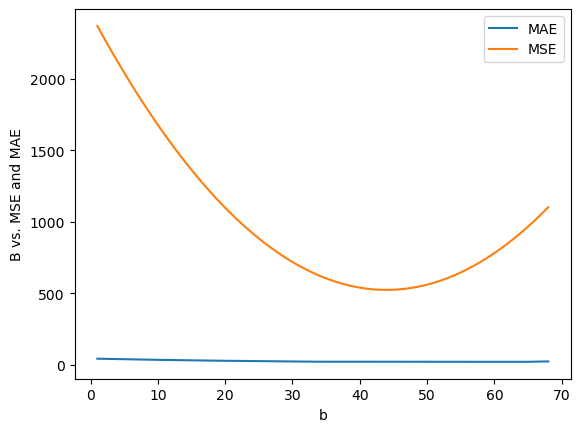

In [30]:
y = df.ROUND

B = np.linspace(y.min(), y.max(), num = 10000)
mae = []
mse = []
for bias in B:
    mae.append(MAE(y, SimpleBiasRegressor(bias, len(y))))
    mse.append(MSE(y, SimpleBiasRegressor(bias, len(y))))

results = pd.DataFrame()
results['b'] = B
results['MAE'] = mae
results['MSE'] = mse

# TODO: plot the results
ax1 = results.plot.line(x='b',y='MAE')
results.plot.line(x='b',y='MSE',ax=ax1)
plt.ylabel('B vs. MSE and MAE')

In [31]:
results.iloc[results['MAE'].idxmin()]

b       63.999700
MAE     20.444872
MSE    925.704381
Name: 9402, dtype: float64

In [36]:
y.mean()

43.962928637627435

In [33]:
y.value_counts()

ROUND
64    512
32    256
16    128
8      64
68     55
4      32
1      16
2      16
Name: count, dtype: int64

In [35]:
err = 1 - y.value_counts().max()/df.shape[0]  # 0 # FIXME
print('baseline error rate',round(err,2))

baseline error rate 0.53
